In [1]:
import sys

# Set the default encoding to UTF-8
if sys.getdefaultencoding() != 'utf-8':
    reload(sys)
    sys.setdefaultencoding('utf-8')


In [2]:
# Importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the Car Details  csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('C:\\Users\\HP\\Desktop\\CAR DETAILS.csv')

## Scrubbing the Data

In [4]:
# Check to see if there are any missing values in our data set

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
# Check the Type of the Dataset

df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [6]:
# Get a quick overview of what we are dealing with in our dataset

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
# Extracting brand name and car model name from name column

df['brand_name'] = df['name'].str.split().str[0]
df['car_name'] = df['name'].str.split().str[1]

In [8]:
# Removing the name column
df.drop('name', axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name,car_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [9]:
# Moving the brand_name and car_name to the froont of the table

brand = df['brand_name']
car = df['car_name']
df.drop(['brand_name', 'car_name'], axis=1, inplace = True)
df.insert(0,'brand_name', brand)
df.insert(1, 'car_name', car)
df.head()

,brand_name,car_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
# Move the reponse variable "selling_price" to the last of the table

last = df['selling_price']
df.drop('selling_price', axis=1, inplace = True)
df.insert(8,'selling_price', last)
df.head()

,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze,2014,141000,Diesel,Individual,Manual,Second Owner,450000


## Statiscal Overview

In [11]:
# Shape of the Datset

print(f'This dataset contains {df.shape[1]} columns and {df.shape[0]} observations')

This dataset contains 9 columns and 4340 observations


In [12]:
df.describe(percentiles = [0.05, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]).T

,count,mean,std,min,5%,50%,90%,95%,96%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2005.0,2014.0,2018.0,2019.0,2019.0,2019.0,2019.0,2020.0,2020.0
km_driven,4340.0,66215.777419,46644.102194,1.0,10000.0,60000.0,120000.0,140000.0,150000.0,163830.0,186000.0,220000.0,806599.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,80000.0,350000.0,900000.0,1300000.0,1479400.0,1720750.0,2492200.0,3200000.0,8900000.0


### Inference :-
- The dataset has 4340 observations and 8 columns.
- Average km driven and selling price is about 66215 and 504127 respectively.
- Oldest car is of year 1992 and the most recent is of year 2020.

## Handling Outliers

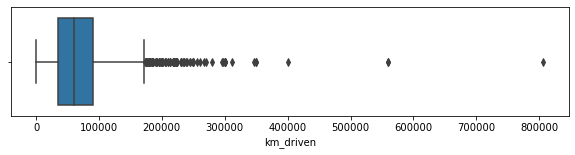

In [13]:
# Boxplot for Outliers

plt.figure(figsize=(10,2))
sns.boxplot(df['km_driven'])
plt.show()

In [14]:
df[df['km_driven']>220000].shape

(43, 9)

In [15]:
# As we can see 99% of the values are lessthan 220000
# Replacing outliers where the KMs Driven is greater than 220000

df['km_driven'] = np.where(df['km_driven']>220000, 220000, df['km_driven'])

# Exploring the Data

## Distribution Plots

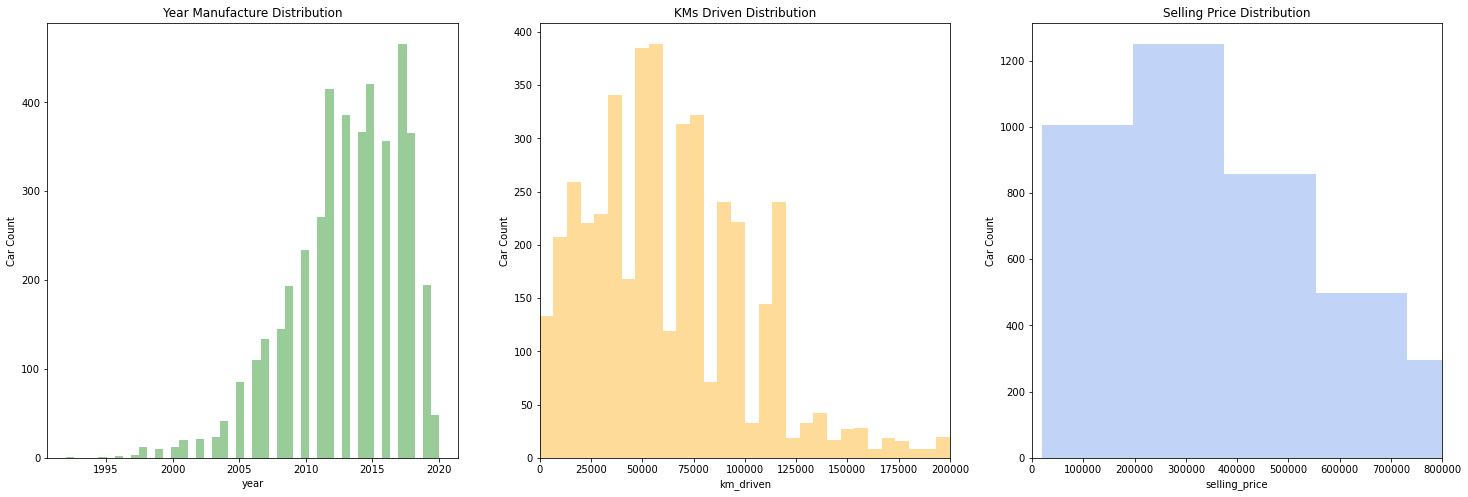

In [16]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(25, 8))

# Graph for Car Manufacturing Year
sns.distplot(df['year'], kde=False, color="g", ax=axes[0]).set_title('Year Manufacture Distribution')
axes[0].set_ylabel('Car Count')

# Graph for KMs Driven by Car
sns.distplot(df['km_driven'], kde=False, color="#FFA500", ax=axes[1]).set_title('KMs Driven Distribution')
axes[1].set_ylabel('Car Count')
axes[1].set_xlim([0,200000])

# Graph for Selling Price of the Car
sns.distplot(df['selling_price'], kde=False, color="cornflowerblue", ax=axes[2]).set_title('Selling Price Distribution')
axes[2].set_ylabel('Car Count')
axes[2].set_xlim([0,800000])

plt.show()

## Summary:
#### Let's examine the distribution on some of the car's features. Here's what I found:

- Year - There is a huge spike for cars manufactured between 2011 to 2018.
- KMs Driven - There is a unimodal distrubtion of km driven with the largest spike in between 50000 to 75000 kms.
- Selling Price - There is another unimodal distribution of selling price with the largest spike between 250000 to 400000.
- The km driven and selling price graphs both share a similar distribution.

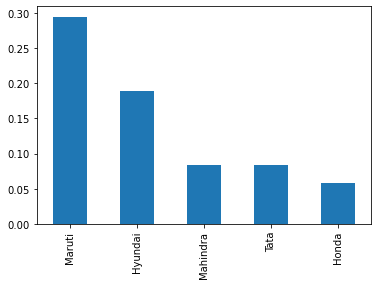

In [17]:
df["brand_name"].value_counts(normalize = True)[:5].plot(kind = 'bar') 

plt.show()

## Inference :-
- Maruti brand have the highest numbers of cars followed by Hyundai.

## Here, we display sales by count in pie graphs

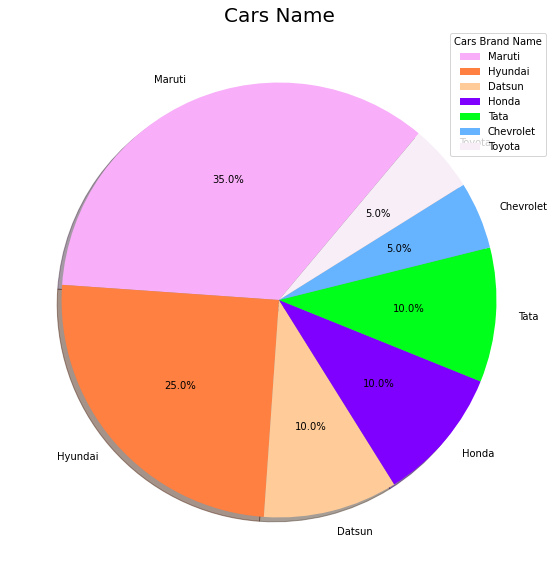

In [18]:


labels = df["brand_name"][:20].value_counts().index # We chose only twenty

sizes = df["brand_name"][:20].value_counts()

data = df.groupby(["brand_name"])["brand_name"].count().sort_values(ascending=False) # to extract the count

x = data.index # to extract the brand name
y = data.values # to extract the count to brand 

colors = ["#F8AEF8",'#FF8040','#ffcc99','#8000FF',"#00FF1B","#66b3ff","#F8EEF8"]#color 

plt.figure(figsize = (10,10)) # Determine the size of the graph

# Creating explode data

# explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=50)#Fomat pie
plt.title('Cars Name',color = 'black',fontsize = 20) # Fomat title

# plt.legend() <br>

plt.legend(title = "Cars Brand Name") # title legend

# plt.legend(wedges, cars, title ="Cars",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
# myexplode = [0.2, 0, 0, 0]
plt.show() # view

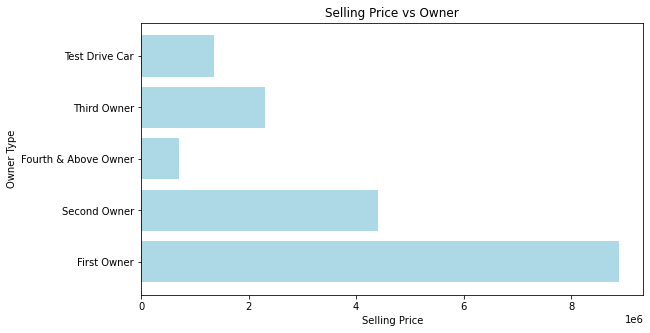

In [19]:
plt.figure(figsize=(9,5))
plt.barh(df['owner'], df['selling_price'], color = 'lightblue')
plt.title('Selling Price vs Owner')
plt.xlabel('Selling Price')
plt.ylabel('Owner Type')
plt.show()

## Inference :-
- First owner cars have the highest selling price followed by Second owner.
- Fourth & Above owner cars significantly have the lowest selling price.
- Although Test Drive car price is even higher than the fourth & above owner.

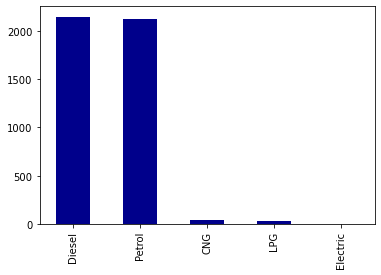

In [20]:
df["fuel"].value_counts(sort =True).plot(kind="bar", color=["darkblue"])
plt.figsize=(8, 4)

## Inference :-
- Mostly cars use Diesel and Petrol.
- There is limited number of cars which uses CNG and LPG.

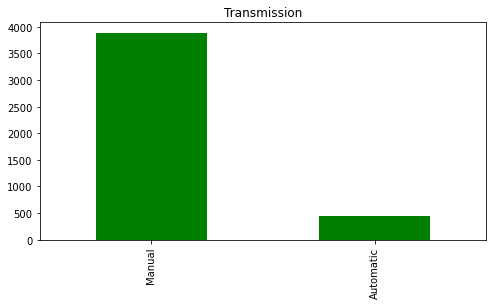

In [21]:
df["transmission"].value_counts(sort = True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Transmission')
plt.show()

## Inference :-
- Mostly cars are Manual in comparison to the Automatic Transmission.

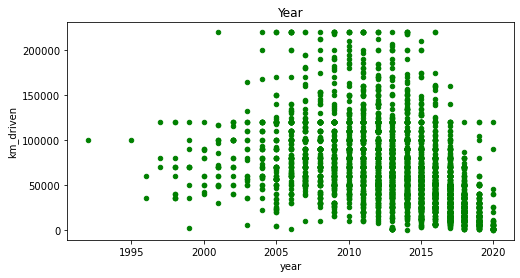

In [22]:
df.plot(x="year", y="km_driven", kind="scatter", figsize=(8, 4), title="Year", color="green");

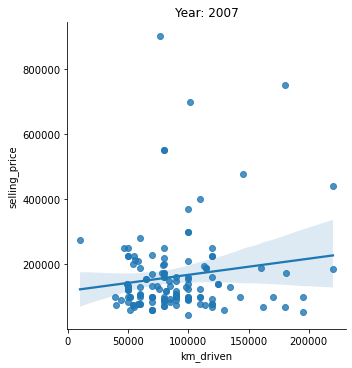

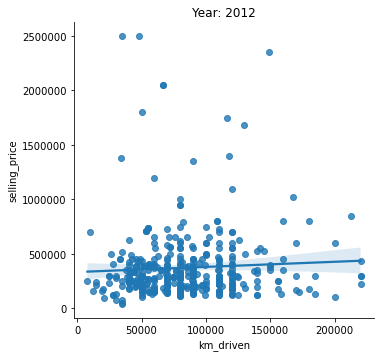

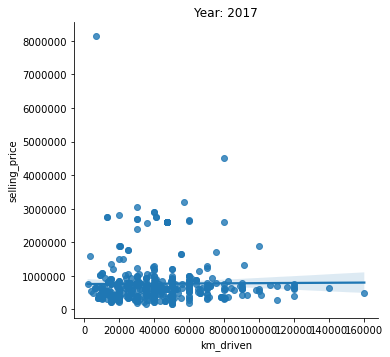

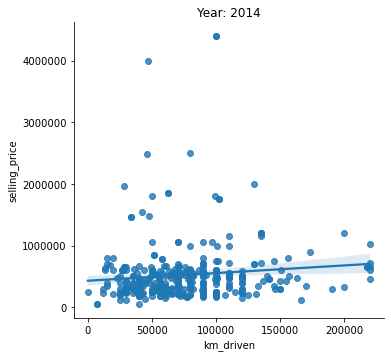

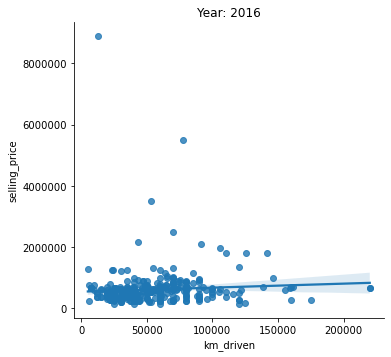

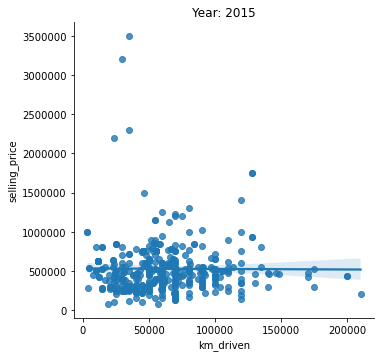

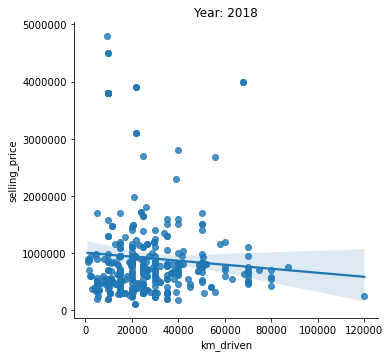

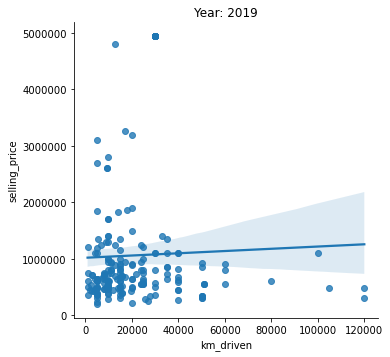

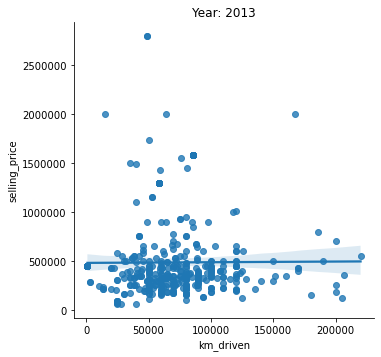

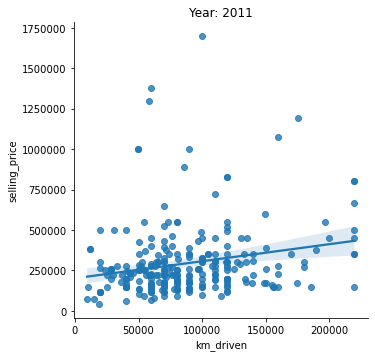

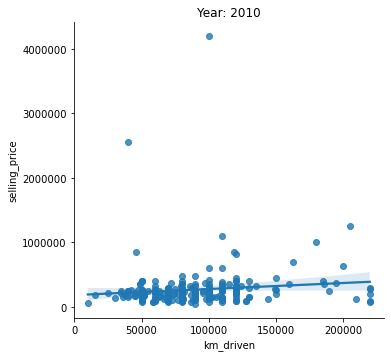

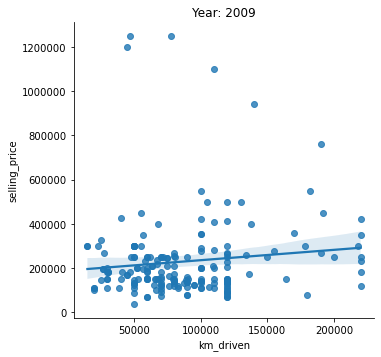

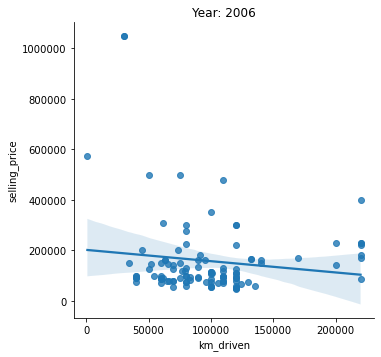

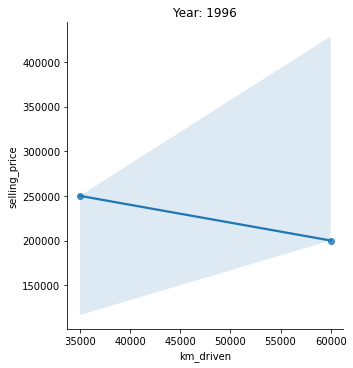

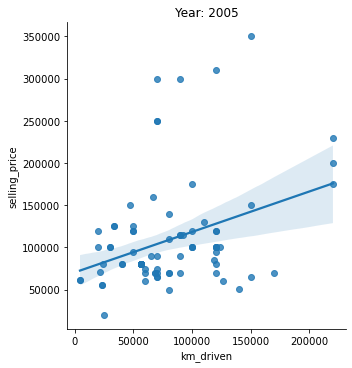

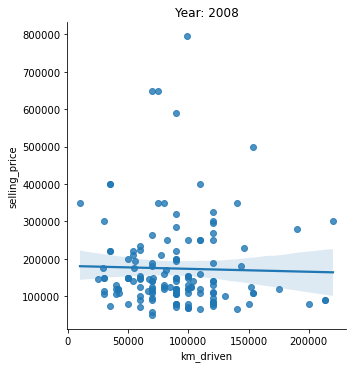

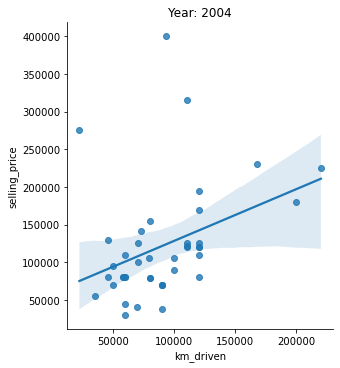

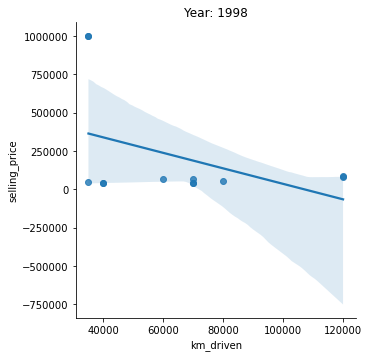

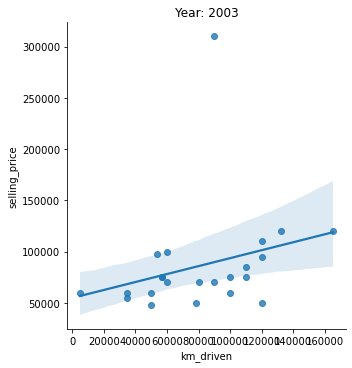

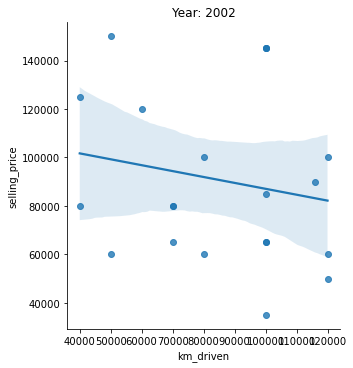

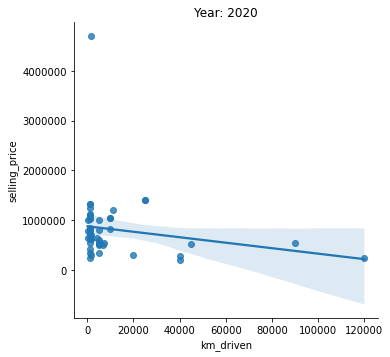

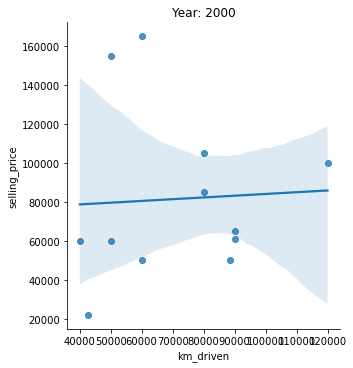

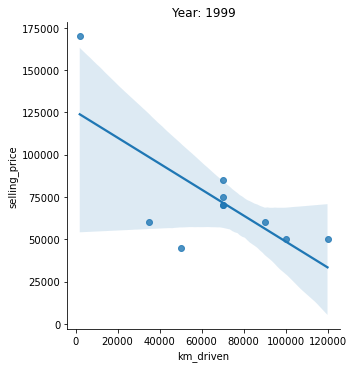

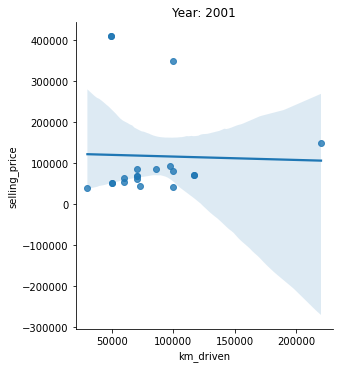

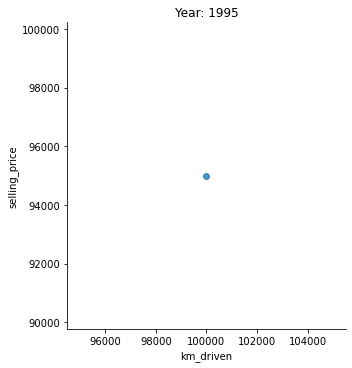

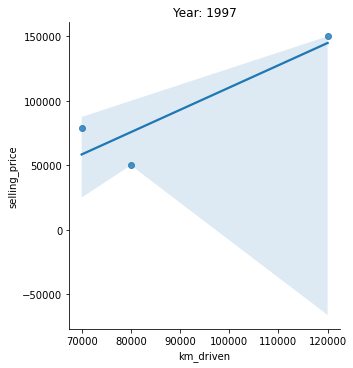

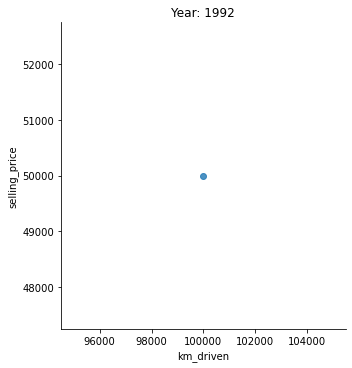

In [23]:
for i in df.year.unique():
    sns.lmplot(x='km_driven', y='selling_price', data=df[(df.year==i)])
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(f'Year: {i}')

# Modeling the Data

### Selecting the Dependent and Independent Features

In [24]:
x = df.drop('selling_price', axis=1) # x = df.iloc[:,:-1])
y = df['selling_price']              # y = df.iloc[:,-1])

print(type(x)) #DataFrame
print(type(y)) #Series

print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4340, 8)
(4340,)


### Splitting the data into train and test data

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =25, random_state = 1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(4315, 8)
(25, 8)
(4315,)
(25,)


### Creating function to evaluate the Regression Evaluation Metrics

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Function for Regression Evaluation Metrics

A = {'Model' : [], 'MAE' : [], 'MSE' : [], 'R2Score' : []}
def eval_model(model_name, y, ypred) :
  mae = mean_absolute_error(y, ypred)
  mse = mean_squared_error(y, ypred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, ypred)
  print('MAE', mae)
  print('MSE', mse)
  print('RMSE', rmse)
  print('R2 Score', r2)
  A['Model'].append(model_name)
  A['MAE'].append(mae)
  A['MSE'].append(mse)
  A['R2Score'].append(r2)

### Importing ML Regression Libraries

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Import the neccessary sklearn transformational Libraries

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Let's get a quick look on the dataset
x.head(2)


,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti,800,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,50000,Petrol,Individual,Manual,First Owner


### 1) Linear Regression

In [29]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')
Model = LinearRegression()
pipe_lr = Pipeline([('CT', CT), ('Model', Model)])
pipe_lr.fit(x_train, y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model('Linear Regression', y_test, ypred_lr)

MAE 104976.90521020413
MSE 19848359545.816944
RMSE 140884.20616171617
R2 Score 0.74475137225523


### 2) Ridge

In [30]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')
Model = Ridge(alpha=5)
pipe_ridge = Pipeline([('CT', CT), ('Model', Model)])
pipe_ridge.fit(x_train, y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model('Ridge Regression', y_test, ypred_ridge)

MAE 110488.20027722359
MSE 21297254094.26316
RMSE 145935.78757201115
R2 Score 0.7261186815089706


### 3) Lasso

In [31]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')
Model = Lasso(alpha=0.1)
pipe_lasso = Pipeline([('CT', CT), ('Model', Model)])
pipe_lasso.fit(x_train, y_train)

ypred_lasso = pipe_lasso.predict(x_test)

eval_model('Lasso Regression', y_test, ypred_lasso)

MAE 104971.045286569
MSE 19855745001.27846
RMSE 140910.41480770137
R2 Score 0.7446563957727923


### 4) KNeighbors Regressor

In [32]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')

# Finding the best value of K with the lowest MSE
k_values = [1, 3, 5, 7, 9]
mse_values = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    pipe_knn = Pipeline([('CT', CT), ('Model', knn)])
    pipe_knn.fit(x_train, y_train)
    y_pred = pipe_knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

best_k = k_values[np.argmin(mse_values)]
print("The best value of k is:", best_k)
print('------------------')

# Training the model and generating Predictions
Model = KNeighborsRegressor(n_neighbors=best_k)
pipe_knn = Pipeline([('CT', CT), ('Model', Model)])
pipe_knn.fit(x_train, y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model('KNeighbors Regressor', y_test, ypred_knn)

The best value of k is: 1
------------------
MAE 116080.0
MSE 31804000000.0
RMSE 178336.7600916872
R2 Score 0.5910026046205152


### 5) Decision Tree Regressor

In [33]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')

Model = DecisionTreeRegressor(max_depth=8, min_samples_split=15)
pipe_dt = Pipeline([('CT', CT), ('Model', Model)])
pipe_dt.fit(x_train, y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model('Decision Tree Regressor', y_test, ypred_dt)

MAE 119419.29852570331
MSE 23337761709.624264
RMSE 152767.0177414754
R2 Score 0.6998778847558988


### 6) Random Forest Regressor

In [34]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')

Model = RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_split=11, random_state=5)
pipe_rf = Pipeline([('CT', CT), ('Model', Model)])
pipe_rf.fit(x_train, y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model('Random Forest Regressor', y_test, ypred_rf)

MAE 120290.32486978681
MSE 24217721004.08385
RMSE 155620.43890210518
R2 Score 0.6885616648001089


### 7) ExtraTreesRegressor

In [35]:
from sklearn.ensemble import ExtraTreesRegressor

In [36]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')
# Create an instance of the Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=10)
pipe_ETR = Pipeline([('CT', CT), ('model', model)])

# Train the model using the training data
pipe_ETR.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_ETR.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
eval_model('ExtraTreesRegressor', y_test, predictions)


Mean Squared Error: 10344597144.92129
MAE 61830.630666666664
MSE 10344597144.92129
RMSE 101708.39269657785
R2 Score 0.8669691457513878


In [37]:
## !pip install lightgbm
## !pip install xgboost
import lightgbm as lgb
import xgboost as xgb

### 8) lightgbm

In [38]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')

model = lgb.LGBMRegressor() # Use LGBMRegressor for regression tasks or LGBMClassifier for classification tasks

pipe_GBM = Pipeline([('CT', CT), ('model', model)])

# Train the model using the training data
pipe_GBM.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_GBM.predict(x_test)

eval_model('lightgbm', y_test, predictions)

MAE 88721.29288259013
MSE 16771823352.51797
RMSE 129506.07457767364
R2 Score 0.784315429916216


In [39]:
model_performance = pd.DataFrame(A)
model_performance.T

,0,1,2,3,4,5,6,7
Model,Linear Regression,Ridge Regression,Lasso Regression,KNeighbors Regressor,Decision Tree Regressor,Random Forest Regressor,ExtraTreesRegressor,lightgbm
MAE,104976.90521,110488.200277,104971.045287,116080.0,119419.298526,120290.32487,61830.630667,88721.292883
MSE,19848359545.816944,21297254094.263161,19855745001.278461,31804000000.0,23337761709.624264,24217721004.083851,10344597144.921289,16771823352.517969
R2Score,0.744751,0.726119,0.744656,0.591003,0.699878,0.688562,0.866969,0.784315


## Inference :-
-- Based on the R2Score the best model is xgboost.

## Save the Model

In [40]:
import pickle
pickle.dump(pipe_ETR, open('car_predict.pkl', 'wb'))    # Saving the best performing model
pickle.dump(df, open('data.pkl', 'wb'))                # Saving the DataFrame

## Load the Model

In [41]:
loaded_model = pickle.load(open('car_predict.pkl', 'rb'))   # rb = read binary

## Making a new random dataset

In [42]:
new_df = df.sample(20)
print(new_df.shape)
new_df.head()

(20, 9)


,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
2872,Maruti,Celerio,2015,45000,Petrol,Individual,Manual,First Owner,220000
4240,Hyundai,Santro,2013,49000,Petrol,Individual,Manual,First Owner,290000
855,Maruti,SX4,2012,60000,Diesel,Individual,Manual,Second Owner,400000
1311,Toyota,Innova,2017,70000,Diesel,Individual,Manual,First Owner,1300000
1864,Mitsubishi,Pajero,2011,120000,Diesel,Individual,Manual,First Owner,825000


In [43]:
# Selecting the Dependent Featurtes and Generating the Predictions

new_x = new_df.drop('selling_price', axis=1) # new_x = df.iloc[:,:-1])
new_ytest = new_df['selling_price']          # new_ytest =df.iloc[:,-1]
print(new_x.shape)

best_pred = loaded_model.predict(new_x)
print(eval_model('Best Model', new_ytest, best_pred))
best_pred

(20, 8)
MAE 475.0
MSE 3012500.0
RMSE 1735.6554957709782
R2 Score 0.9999714822598357
None


array([ 220000.,  290000.,  400000., 1300000.,  825000.,   82500.,
        315000.,  650000.,  500000.,  500000.,  162000.,  180000.,
        245000.,  675000.,  600000.,  580000.,  680000.,  350000.,
        250000., 1250000.])

In [44]:
# Printing the Predicted Results
res = pd.DataFrame(new_x)
res['selling_price'] = best_pred.round(decimals=2)
res

,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
2872,Maruti,Celerio,2015,45000,Petrol,Individual,Manual,First Owner,220000.0
4240,Hyundai,Santro,2013,49000,Petrol,Individual,Manual,First Owner,290000.0
855,Maruti,SX4,2012,60000,Diesel,Individual,Manual,Second Owner,400000.0
1311,Toyota,Innova,2017,70000,Diesel,Individual,Manual,First Owner,1300000.0
1864,Mitsubishi,Pajero,2011,120000,Diesel,Individual,Manual,First Owner,825000.0
3898,Tata,Indica,2010,220000,Petrol,Individual,Manual,Third Owner,82500.0
1619,Hyundai,EON,2017,18469,Petrol,Trustmark Dealer,Manual,First Owner,315000.0
3374,Hyundai,Elantra,2013,54000,Diesel,Dealer,Manual,First Owner,650000.0
3922,Tata,Sumo,2016,60000,Diesel,Individual,Manual,First Owner,500000.0
1486,Renault,Duster,2013,190000,Diesel,Individual,Manual,Second Owner,500000.0
